In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from scipy.stats import uniform

import model_pipeline

seed = 777
rng = np.random.default_rng(seed)

def rng_int():
    return rng.integers(1, 10000)

In [2]:
df = pd.read_csv('../data/preprocessed/_90_drp_outl.csv', index_col='obj_ID')

X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=rng_int())

kfold = KFold(n_splits=5, shuffle=True, random_state=rng_int())

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif)),
    ('pca', PCA()),
    ('classifier', SVC())
])

param_dist = {
    'feature_selection__k': [4, 5, 6, 7],
    'pca__n_components': [2, 3, 4],
    'classifier__C': uniform(loc=0.01, scale=10),
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

best_model, best_params, best_score = model_pipeline.get_best_params(pipeline, param_dist, kfold, X_train, y_train)

print("Melhores parâmetros:", best_params)
print("Melhor acurácia:", best_score)

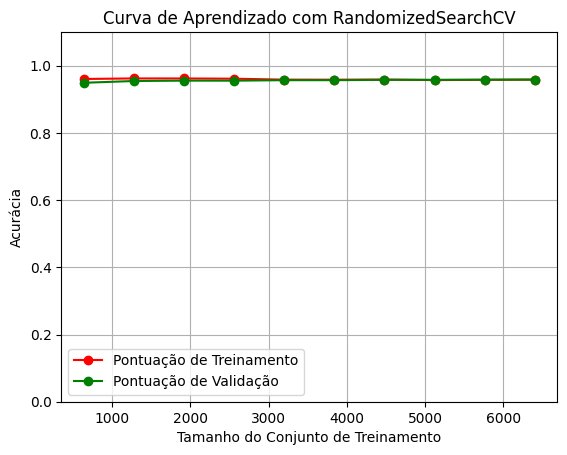

In [ ]:
model_pipeline.plot_learning_curve(best_model, X_train, y_train, cv=kfold, title="Curva de Aprendizado com RandomizedSearchCV")

In [ ]:
from win10toast import ToastNotifier

def notificar(titulo, mensagem):
    toaster = ToastNotifier()
    toaster.show_toast(titulo, mensagem, duration=10)

notificar("Tarefa Concluída", "Seu código terminou de rodar!")

WNDPROC return value cannot be converted to LRESULT


TypeError: WPARAM is simple, so must be an int object (got NoneType)